<a href="https://colab.research.google.com/github/Bosy-Ayman/DSAI-402-RL/blob/main/Assignment1_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

## Reading

- Read Chapter 1 and 2 from the supplementary book

- Read Chapter 1 from the main book

## Paper-based

1. A financial analyst is studying a currency exchange rate that changes daily between three states: appreciating, depreciating, or stable. If the exchange rate appreciates on a given day, there is a 25% chance it will continue to appreciate the next day, a 40% chance it will stabilize, and a 35% chance it will depreciate. If the rate depreciates on a particular day, the next day it has a 30% chance to appreciate, 50% chance to depreciate again, and 20% chance to remain stable. When the rate is stable, it is equally likely to appreciate or depreciate the next day.
    - Model this scenario as a Markov chain and write the transition probability matrix

2. A city has four bus stops labeled 1, 2, 3, and 4. Passengers travel between these stops with the following probabilities:
	- From stop 1, passengers go to stop 2 with 35% probability, to stop 3 with 40%, and remain at stop 1 with 25%.
	- From stop 2, 55% travel to stop 1, and 45% go to stop 4.
	- From stop 3, 20% go to stop 2, 60% stay at stop 3, and 20% go to stop 4.
	- From stop 4, 30% travel to stop 1, 30% to stop 2, 20% to stop 3, and 20% remain at stop 4.

    - Perform the following tasks
        - Write the transition matrix T
        - What is the probability that a passenger currently at stop 3 will travel to stop 4 next?
    	- What is the probability that a passenger currently at stop 3 will reach stop 4 after two stops?
    	- What is the probability that a passenger currently at stop 3 will stay at stop 3 and not travel to any other stop next?


## Implementation

- Define a transition probability matrix
- Start from a chosen initial state, simulate the Markov chain for a large number of transitions
- Record the state at each step of the simulation
- Use the library [networkx](https://networkx.org/) to plot the transition matrix as a graph



---



In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# **Main Functions**

In [ ]:
def markov(T, start_state, steps):
    state = start_state
    states = [state]
    for _ in range(steps):
        state = np.random.choice(range(len(T)), p=T[state])
        states.append(state)
    return states

In [ ]:
def transition_graph(T, labels, title):
    G = nx.DiGraph()
    for i, from_state in enumerate(labels):
        for j, to_state in enumerate(labels):
            if T[i][j] > 0:
                G.add_edge(from_state, to_state, weight=T[i][j])

    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='green', node_size=1000, arrows=True, connectionstyle='arc3,rad=0.1')

    # To avoid overlap
    edge_labels = {(i, j): f"{w['weight']:.2f}" for i, j, w in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.4, rotate=False, font_color='blue')

    plt.title(title)
    plt.show()


# Problem 1 : currency exchange


In [ ]:
states1 = ["A", "D", "S"]
T1 = np.array([
    [0.25, 0.35, 0.40],
    [0.30, 0.50, 0.20],
    [0.50, 0.50, 0.00]
])

In [ ]:
simulation = markov(T1, start_state=2, steps=20)
print("Visited states:", [states2[s] for s in simulation])

Visited states: [3, 2, 1, 2, 1, 3, 1, 2, 3, 2, 2, 1, 2, 2, 2, 1, 3, 1, 3, 1, 2]


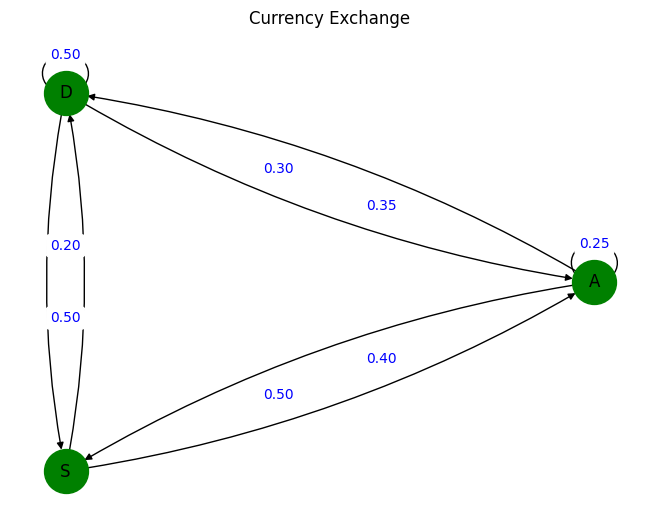

In [ ]:
transition_graph(T1, states1, "Currency Exchange")



---



# Problem 2: bus stop


Visited states: [3, 3, 2, 4, 1, 1, 1, 3, 3, 2, 4, 2, 4, 1, 2, 4, 4, 1, 3, 4, 1]


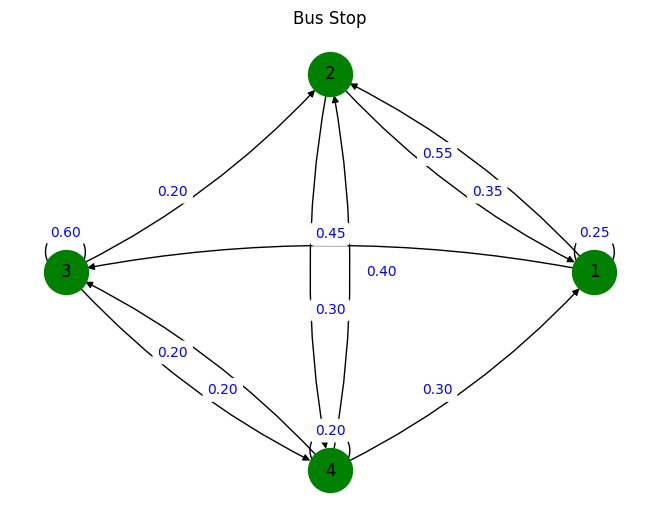

In [ ]:
states2 = [1, 2, 3, 4]
T2 = np.array([
    [0.25, 0.35, 0.4, 0.0],
    [0.55, 0.0, 0.0, 0.45],
    [0.0, 0.2, 0.6,0.2],
    [0.3, 0.3, 0.2,0.2]
])

simulation = markov(T2, start_state=2, steps=20)
print("Visited states:", [states2[s] for s in simulation])

transition_graph(T2, states2, "Bus Stop")
